In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [3]:
data_new = data['1995-01':'2025-08'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [4]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')
Month_data

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [5]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Month_data.index.name = 'month'
Month_data

,Ret
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [6]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Quarter_data.index.name = 'Q'
Quarter_data

,Ret
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2024-09-30,0.124383
2024-12-31,0.004575
2025-03-31,-0.004779


In [7]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Year_data.index.name = 'Y'
Year_data

,Ret
Y,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [8]:
# 汇总日/月/年收益率的描述性统计指标
def summarize_returns(series):
    clean_series = series.dropna()
    return pd.Series({
        '样本数': clean_series.count(),
        '均值': clean_series.mean(),
        '中位数': clean_series.median(),
        '标准差': clean_series.std(),
        '方差': clean_series.var(),
        '最小值': clean_series.min(),
        '25%分位数': clean_series.quantile(0.25),
        '50%分位数': clean_series.quantile(0.5),
        '75%分位数': clean_series.quantile(0.75),
        '最大值': clean_series.max(),
        '正收益比例': (clean_series > 0).mean(),
        '偏度': clean_series.skew(),
        '峰度': clean_series.kurt()
    })

return_periods = {
    '日收益率': data_new.loc['2000-01':'2025-08', 'Raw_return'],
    '月收益率': Month_data.loc['2000-01':'2025-08', 'Ret'],
    '年收益率': Year_data.loc['2000':'2025', 'Ret']
}

returns_summary = pd.DataFrame({
    name: summarize_returns(series) for name, series in return_periods.items()
}).T
returns_summary['正收益比例'] = returns_summary['正收益比例'].mul(100)
returns_summary.rename(columns={'正收益比例': '正收益比例(%)'}, inplace=True)
returns_summary = returns_summary.round({
    '样本数': 0,
    '均值': 5,
    '中位数': 5,
    '标准差': 5,
    '方差': 7,
    '最小值': 5,
    '25%分位数': 5,
    '50%分位数': 5,
    '75%分位数': 5,
    '最大值': 5,
    '正收益比例(%)': 2,
    '偏度': 3,
    '峰度': 3
})
returns_summary['样本数'] = returns_summary['样本数'].astype(int)
returns_summary

,样本数,均值,中位数,标准差,方差,最小值,25%分位数,50%分位数,75%分位数,最大值,正收益比例(%),偏度,峰度
日收益率,6219,0.00027,0.00051,0.01462,0.000214,-0.08841,-0.00615,0.00051,0.00700,0.09857,52.68,-0.212,5.631
月收益率,308,0.00582,0.00457,0.06979,0.004870,-0.24631,-0.03590,0.00457,0.04199,0.27446,54.22,-0.055,1.991
年收益率,26,0.10927,0.03985,0.41714,0.174006,-0.65394,-0.14922,0.03985,0.14793,1.30433,53.85,1.284,2.094


In [9]:
round(data_new['2000-01':'2025-08']['Raw_return'].mean(),5)

0.00027

In [10]:
np.mean(data_new['2000-01':'2025-08']['Raw_return'])

0.0002740673718891408

In [11]:
print('中国股票市场日度平均收益率为',data_new['2000-01':'2025-08']['Raw_return'].mean().round(5)*100,'%',sep="")

中国股票市场日度平均收益率为0.027%


In [12]:
print('中国股票市场月度平均收益率为',Month_data['2000-01':'2025-08']['Ret'].mean().round(4)*100,'%',sep="")

中国股票市场月度平均收益率为0.58%


In [13]:
print('中国股票市场年度平均收益率为',Year_data['2000':'2025']['Ret'].mean().round(4)*100,'%',sep="")

中国股票市场年度平均收益率为10.93%


In [14]:
sum(data_new['2000-01':'2024-09']['Raw_return']) / len(data_new['2000-01':'2024-09']['Raw_return'])

0.0002576419497498928

In [15]:
data_new['1995-01':'2025-08']['Raw_return'].describe()

count    7445.000000
mean        0.000372
std         0.016331
min        -0.163937
25%        -0.006607
50%         0.000496
75%         0.007503
max         0.309870
Name: Raw_return, dtype: float64

In [16]:
len(data_new['1995-01':'2024-09'])

7223

In [17]:
len(data_new[data_new["Raw_return"] > 0])

3903

In [18]:
len(data_new[data_new["Raw_return"] > 0])/len(data_new)

0.5242444593687038

In [19]:
from statistics import quantiles

# quantiles函数里面的参数需要注意
# 计算data_new在1995-01到2025-08期间Raw_return的十分位数
# n=10 表示分成10份（十分位数），method='exclusive' 表示使用不包含端点的分位数计算方法
quantiles(data_new['1995-01':'2025-08']['Raw_return'], n = 10, method='exclusive')

[-0.016149825200764644,
 -0.008725465267893506,
 -0.004824058860378355,
 -0.001823562879049323,
 0.000496269119653947,
 0.0028404410444615724,
 0.005705730958616373,
 0.009680619902095611,
 0.016938708022350025]

In [20]:
quantiles(data_new['1995-01':'2024-09']['Raw_return'], n = 10, method='inclusive') 

[-0.016273486796843283,
 -0.008904480681335824,
 -0.0049105335359804995,
 -0.0019112410821794379,
 0.0004683483640481878,
 0.0028484509548271308,
 0.005764948233341815,
 0.009789313259894784,
 0.017182938215153553]

In [21]:
max(Month_data['2000-01':'2025-08']['Ret'])

0.2744642236184609

In [22]:
min(Month_data['2000-01':'2025-08']['Ret'])

-0.2463139446677537

In [23]:
quantiles(Month_data['1995-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.07275859939933171,
 -0.04791044569180978,
 -0.026743591620732254,
 -0.007438510711914969,
 0.004471851221674816,
 0.020382622493721046,
 0.03630346419175008,
 0.05424194628329713,
 0.10003790772865565]

In [24]:
import statistics
help(statistics.quantiles)

Help on function quantiles in module statistics:

quantiles(data, *, n=4, method='exclusive')
    Divide *data* into *n* continuous intervals with equal probability.

    Returns a list of (n - 1) cut points separating the intervals.

    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.

    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.

    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.



In [26]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
q = statistics.quantiles(data, n=4, method='exclusive')
print(q)

[5.25, 10.5, 15.75]


In [27]:
q = statistics.quantiles(data, n=4, method='inclusive')
print(q)

[5.75, 10.5, 15.25]


In [28]:
Month_data['2000-01':'2025-08']['Ret'].describe()

count    308.000000
mean       0.005821
std        0.069785
min       -0.246314
25%       -0.035898
50%        0.004569
75%        0.041993
max        0.274464
Name: Ret, dtype: float64

In [29]:
statistics.quantiles(Month_data['Ret'], n = 10, method='inclusive')

[-0.0709964521333589,
 -0.047737015530115404,
 -0.026630590375295526,
 -0.007411841595713531,
 0.004471851221674816,
 0.020217863557133686,
 0.03625761917881416,
 0.05352850908377551,
 0.09697370519393292]

In [30]:
quantiles(Month_data['2000-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.06407330856971007,
 -0.04690477004328284,
 -0.02294678764968542,
 -0.006030700018074264,
 0.004568893904690174,
 0.018850177397894186,
 0.03537258283387652,
 0.05187838634791797,
 0.08409364977091105]

In [31]:
seq = np.linspace(0,1,11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [32]:
np.quantile(data_new['2000-01':'2024-09']['Raw_return'],q=seq)

array([-0.08840689, -0.01536682, -0.00833553, -0.00468863, -0.00176721,
        0.00049848,  0.00268087,  0.00538043,  0.00914657,  0.01601642,
        0.09856839])

In [33]:
np.var(data_new['2000-01':'2025-08']['Raw_return'])

0.0002137799963357011

In [34]:
m = np.mean(data_new['2000-01':'2025-08']['Raw_return'])
sum((data_new['2000-01':'2025-08']['Raw_return'] - m)**2) / (len(data_new['2000-01':'2025-08']['Raw_return'])-1)

0.00021381437716496018

In [35]:
np.std(data_new['2000-01':'2025-08']['Raw_return'])

0.01462121733426123

In [36]:
np.sqrt(np.var(data_new['2000-01':'2025-08']['Raw_return']))

0.01462121733426123

In [37]:
from math import sqrt

sqrt(np.var(data_new['2000-01':'2024-09']['Raw_return']))

0.014732982591047728

In [ ]:
monthly_var = data_new.resample('ME')['Raw_return'].var().to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var
#衡量收益率围绕其均值的离散程度，没有偏估值，标准统计

,variance
month,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2025-04-30,0.000304
2025-05-31,0.000032
2025-06-30,0.000030


In [ ]:
monthly_var = data_new.resample('ME')['Raw_return'].apply(lambda x: np.sum(x ** 2)).to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var
#只是衡量收益率大小

,variance
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2025-04-30,0.006097
2025-05-31,0.000602
2025-06-30,0.000609


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found

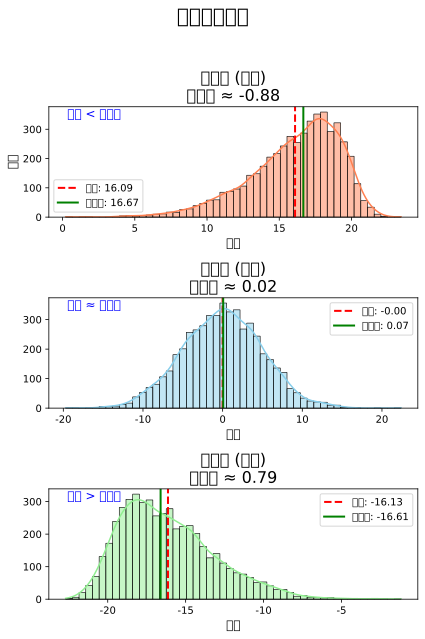

In [40]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, skew
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS'] # macOS常用中文字体，并添加备用字体
    plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同偏度的数据 ---
np.random.seed(42) # 设置随机种子，保证每次运行结果一致
n_samples = 5000   # 样本数量

# 生成负偏度数据 (左偏)
# a < 0 会产生负偏度
data_neg = skewnorm.rvs(a=-5, loc=20, scale=5, size=n_samples)
skew_neg = skew(data_neg)

# 生成零偏度数据 (对称分布，接近正态分布)
# a = 0 时，skewnorm生成的就是正态分布
data_zero = skewnorm.rvs(a=0, loc=0, scale=5, size=n_samples)
skew_zero = skew(data_zero)

# 生成正偏度数据 (右偏)
# a > 0 会产生正偏度
data_pos = skewnorm.rvs(a=5, loc=-20, scale=5, size=n_samples)
skew_pos = skew(data_pos)

# --- 2. 可视化 ---
# 创建一个1行3列的图，用于并排展示三个分布
fig, axes = plt.subplots(3,1, figsize=(6, 9))
fig.suptitle('偏度分布示例', fontsize=20)


# (1) 绘制负偏度分布图
sns.histplot(data_neg, kde=True, ax=axes[0], color='coral', bins=50)
axes[0].set_title(f'负偏度 (左偏)\n偏度值 ≈ {skew_neg:.2f}', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
# 标出均值和中位数的位置，帮助理解偏度对它们的影响
mean_neg = np.mean(data_neg)
median_neg = np.median(data_neg)
axes[0].axvline(mean_neg, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_neg:.2f}')
axes[0].axvline(median_neg, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_neg:.2f}')
axes[0].legend()
axes[0].text(0.05, 0.9, '均值 < 中位数', transform=axes[0].transAxes, fontsize=12, color='blue')


# (2) 绘制零偏度分布图
sns.histplot(data_zero, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f'零偏度 (对称)\n偏度值 ≈ {skew_zero:.2f}', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('') # 中间的图不显示y轴标签，避免拥挤
mean_zero = np.mean(data_zero)
median_zero = np.median(data_zero)
axes[1].axvline(mean_zero, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_zero:.2f}')
axes[1].axvline(median_zero, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_zero:.2f}')
axes[1].legend()
axes[1].text(0.05, 0.9, '均值 ≈ 中位数', transform=axes[1].transAxes, fontsize=12, color='blue')


# (3) 绘制正偏度分布图
sns.histplot(data_pos, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(f'正偏度 (右偏)\n偏度值 ≈ {skew_pos:.2f}', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
mean_pos = np.mean(data_pos)
median_pos = np.median(data_pos)
axes[2].axvline(mean_pos, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_pos:.2f}')
axes[2].axvline(median_pos, color='green', linestyle='-', linewidth=2, label=f'中位数: {median_pos:.2f}')
axes[2].legend()
axes[2].text(0.05, 0.9, '均值 > 中位数', transform=axes[2].transAxes, fontsize=12, color='blue')


# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95]) # 调整布局，为大标题留出空间
plt.show();

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found

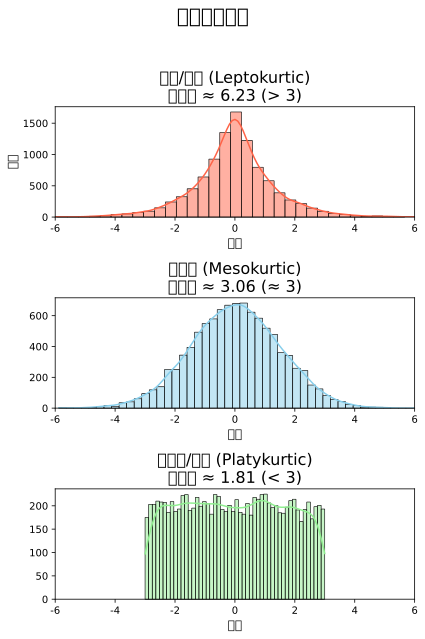

In [41]:
# 导入所需库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm, laplace, uniform
import seaborn as sns

# 设置中文字体，以正常显示图中的中文标签
# 请确保您的环境中已安装'PingFang SC'字体（macOS默认），否则可以替换为其他中文字体
try:
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS'] # macOS常用中文字体，并添加备用字体
    plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题
except Exception as e:
    print(f"设置中文字体失败，请检查字体是否安装: {e}")
    # 如果没有'PingFang SC'字体，可以注释掉上面两行，或者更换为系统支持的其他中文字体

# --- 1. 生成不同峰度的数据 ---
np.random.seed(42)
n_samples = 10000

# 生成尖峰/厚尾数据 (Leptokurtic)
# 拉普拉斯分布是典型的尖峰厚尾分布
data_lepto = laplace.rvs(loc=0, scale=1, size=n_samples)
# 使用 fisher=False 计算原始峰度值，此时正态分布的峰度为3
kurt_lepto = kurtosis(data_lepto, fisher=False)

# 生成常态峰数据 (Mesokurtic)
# 正态分布
data_meso = norm.rvs(loc=0, scale=1.5, size=n_samples) # 调整scale使视觉效果更清晰
kurt_meso = kurtosis(data_meso, fisher=False)

# 生成低阔峰/瘦尾数据 (Platykurtic)
# 均匀分布是典型的低阔峰
data_platy = uniform.rvs(loc=-3, scale=6, size=n_samples) # 范围从-3到3
kurt_platy = kurtosis(data_platy, fisher=False)

# --- 2. 可视化 ---
fig, axes = plt.subplots(3, 1, figsize=(6, 9))
fig.suptitle('峰度分布示例', fontsize=20)
common_xlim = (-6, 6) # 设置统一的x轴范围，便于比较

# (1) 绘制尖峰/厚尾分布
sns.histplot(data_lepto, kde=True, ax=axes[0], color='tomato', bins=50)
axes[0].set_title(f'尖峰/厚尾 (Leptokurtic)\n峰度值 ≈ {kurt_lepto:.2f} (> 3)', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
axes[0].set_xlim(common_xlim)

# (2) 绘制常态峰分布
sns.histplot(data_meso, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f'常态峰 (Mesokurtic)\n峰度值 ≈ {kurt_meso:.2f} (≈ 3)', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(common_xlim)

# (3) 绘制低阔峰/瘦尾分布
sns.histplot(data_platy, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(f'低阔峰/瘦尾 (Platykurtic)\n峰度值 ≈ {kurt_platy:.2f} (< 3)', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
axes[2].set_xlim(common_xlim)

# 调整布局并显示图像
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

In [42]:
# Daily data
len(data_new['1995-01':'2025-08'])
data_new['1995-01':'2025-08']['Raw_return'].skew()
data_new['1995-01':'2025-08']['Raw_return'].kurt()
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=False) - 3
scipy.stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'],fisher=True)

7445

0.6772796464034425

23.63802106137419

23.621343146464902

23.621343146464902

In [43]:
m = np.mean(data_new['1995-01':'2024-09']['Raw_return'])
l = len(data_new['1995-01':'2024-09']['Raw_return'])
sum(((data_new['1995-01':'2024-09']['Raw_return'] - m)/np.std(data_new['1995-01':'2024-09']['Raw_return']))**4) / l -3

23.45514481569284

In [44]:
data_new['1995-01':'2025-08']['Raw_return'].skew()
data_new['1995-01':'2025-08']['Raw_return'].kurt()

0.6772796464034425

23.63802106137419

In [45]:
# Monthly data
Month_data['1995-01':'2025-08']['Ret'].skew()
Month_data['1995-01':'2025-08']['Ret'].kurt()

0.3266812712820461

2.0120324549166306

In [46]:
# Quarterly data
Quarter_data['1995-01':'2024-09']['Ret'].skew()
Quarter_data['1995-01':'2024-09']['Ret'].kurt()

0.8675024485714982

1.7137615374448099

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found

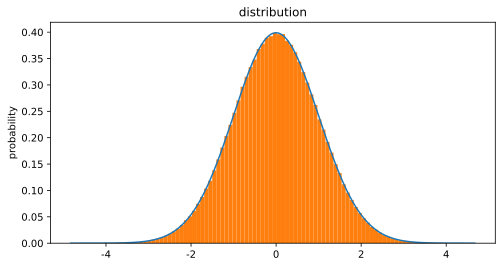

In [47]:
# 根据均值、标准差,求指定范围的正态分布概率值

'''"
normfun(x, mu, sigma) 函数定义了一个正态分布的概率密度函数，
其中 x 是自变量
mu 是均值
sigma 是标准差
这个函数计算了在给定均值和标准差下 x 处的概率密度值。
'''

def normfun(x, mu, sigma):
  pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
  return pdf


# 生成高斯分布的概率密度随机数
result = np.random.normal(0, 1, 1000000) # mean 0 and standard deviation 1

# np.arange()
# 函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是6，步长为1。
# 参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

x = np.arange(min(result), max(result),0.01)

# 设定 y 轴，载入刚才的正态分布函数
y = normfun(x, result.mean(), result.std())

# 修改画图的大小
plt.figure(figsize=(8, 4)) # 设置图形大小为宽10英寸，高6英寸
plt.plot(x, y) # 这里画出理论的正态分布概率曲线
 
# 这里画出实际的参数概率与取值关系
fig = plt.hist(result, bins=100, rwidth=1, density=True) # bins=100 表示将数据分成100个柱状图，density=True 表示将频率转换为概率密度。宽度是rwidth(0~1),=1没有缝隙
plt.title('distribution')
#plt.xlabel('')
plt.ylabel('probability')
# 输出
plt.show(); # 最后图片的概率和不为1是因为正态分布是从负无穷到正无穷,这里指截取了数据最小值到最大值的分布

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found

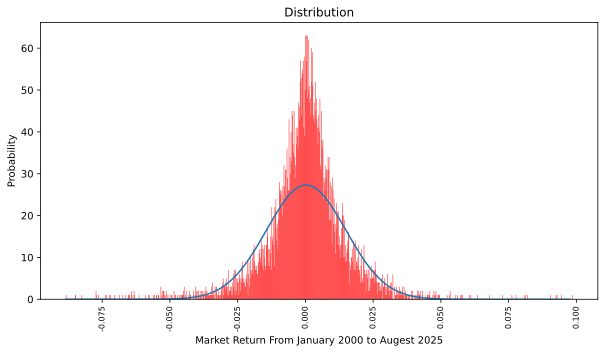

In [48]:
retmean = data_new['2000-01':'2025-08']['Raw_return'].mean()
retstd = data_new['2000-01':'2025-08']['Raw_return'].std()
retmin = data_new['2000-01':'2025-08']['Raw_return'].min()
retmax = data_new['2000-01':'2025-08']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)

fig = plt.hist(data_new['2000-01':'2025-08']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to Augest 2025')
plt.ylabel('Probability')
plt.show();

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found

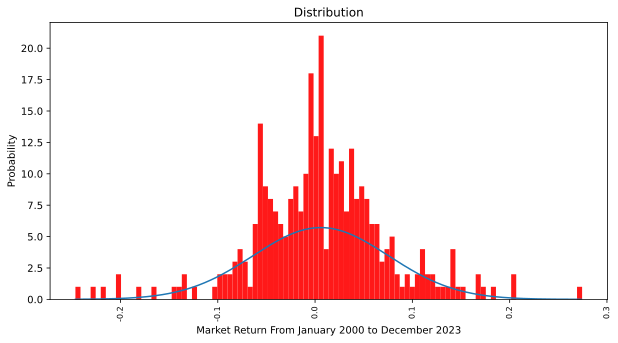

In [49]:
retmean = Month_data['2000-01':'2025-08']['Ret'].mean()
retstd = Month_data['2000-01':'2025-08']['Ret'].std()
retmin = Month_data['2000-01':'2025-08']['Ret'].min()
retmax = Month_data['2000-01':'2025-08']['Ret'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001)
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5)) # 图片大小 10，5
plt.plot(x, y)

fig = plt.hist(Month_data['2000-01':'2025-08']['Ret'],
               bins=100,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to December 2023')
plt.ylabel('Probability')
plt.show();

In [50]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对月收益率数据进行ADF检验
adf_result = ADF(Month_data['2000-01':'2024-09']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -6.0735
p-value: 0.0000
Critical Values:
   1%: -3.4537
   5%: -2.8718
   10%: -2.5722
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [51]:
from statsmodels.tsa.stattools import adfuller as ADF
adf_result = ADF(Quarter_data['2000':'2025']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')


原始序列的ADF检验结果:
ADF Statistic: -5.6533
p-value: 0.0000
Critical Values:
   1%: -3.4989
   5%: -2.8915
   10%: -2.5828
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [52]:
adf_result = ADF(data_new['2000-01':'2025-08']['Raw_return'])
print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -12.4417
p-value: 0.0000
Critical Values:
   1%: -3.4314
   5%: -2.8620
   10%: -2.5670
结论: p-value小于0.05，拒绝原假设，序列是平稳的。
